In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
sns.set_style()

In [2]:
from datetime import datetime
from dateutil import parser
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
df=pd.read_csv('Dataset 3.csv')
df

,Date,dewPoint,fog,hail,humidity,pressure,rain,maximumTemp,thunder,averageWindSpeed,maxWindSpeed
0,01-11-96,11.666667,0.000,0.0,52.916667,-2659.666667,0.0,22.333333,0.0,0.616667,7.4
1,02-11-96,10.458333,0.000,0.0,48.625000,1009.833333,0.0,22.916667,0.0,7.025000,22.2
2,03-11-96,12.041667,0.000,0.0,55.958333,1010.500000,0.0,21.791667,0.0,4.404167,24.1
3,04-11-96,10.222222,0.000,0.0,48.055556,1011.333333,0.0,22.722222,0.0,1.855556,11.1
4,05-11-96,8.200000,0.000,0.0,29.400000,1011.800000,0.0,27.800000,0.0,10.020000,14.8
...,...,...,...,...,...,...,...,...,...,...,...
6854,27-12-15,9.500000,0.250,0.0,63.250000,1020.625000,0.0,15.375000,0.0,7.887500,11.1
6855,28-12-15,10.250000,0.000,0.0,58.125000,1020.875000,0.0,17.125000,0.0,10.887500,18.5
6856,29-12-15,10.875000,0.125,0.0,65.000000,1018.125000,0.0,16.375000,0.0,7.412500,14.8
6857,30-12-15,10.625000,0.375,0.0,71.750000,1017.500000,0.0,15.500000,0.0,2.100000,5.6


In [4]:
testData=pd.read_csv('Dataset 4.csv')
testData=testData[['Date','maximumTemp']]

In [5]:
df=df.drop(['fog','hail','thunder','maxWindSpeed'],axis=1)

In [6]:
df

,Date,dewPoint,humidity,pressure,rain,maximumTemp,averageWindSpeed
0,01-11-96,11.666667,52.916667,-2659.666667,0.0,22.333333,0.616667
1,02-11-96,10.458333,48.625000,1009.833333,0.0,22.916667,7.025000
2,03-11-96,12.041667,55.958333,1010.500000,0.0,21.791667,4.404167
3,04-11-96,10.222222,48.055556,1011.333333,0.0,22.722222,1.855556
4,05-11-96,8.200000,29.400000,1011.800000,0.0,27.800000,10.020000
...,...,...,...,...,...,...,...
6854,27-12-15,9.500000,63.250000,1020.625000,0.0,15.375000,7.887500
6855,28-12-15,10.250000,58.125000,1020.875000,0.0,17.125000,10.887500
6856,29-12-15,10.875000,65.000000,1018.125000,0.0,16.375000,7.412500
6857,30-12-15,10.625000,71.750000,1017.500000,0.0,15.500000,2.100000


In [7]:
dfMaxTemp=df[['Date','maximumTemp']]
dfMaxTemp

,Date,maximumTemp
0,01-11-96,22.333333
1,02-11-96,22.916667
2,03-11-96,21.791667
3,04-11-96,22.722222
4,05-11-96,27.800000
...,...,...
6854,27-12-15,15.375000
6855,28-12-15,17.125000
6856,29-12-15,16.375000
6857,30-12-15,15.500000


In [8]:
dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)
dfMaxTemp=dfMaxTemp.set_index(['Date'])
dfMaxTemp

/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_25778/1693794078.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)
/var/folders/73/1fbt52l13hl2_rtlv49ngykr0000gn/T/ipykernel_25778/1693794078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMaxTemp['Date']=pd.to_datetime(dfMaxTemp['Date'],dayfirst=True)


,maximumTemp
Date,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2015-12-27,15.375000
2015-12-28,17.125000
2015-12-29,16.375000


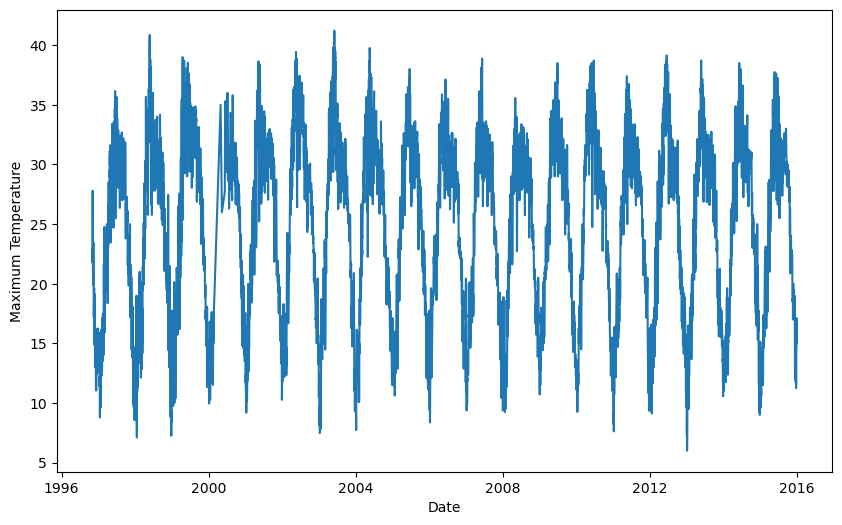

In [9]:
plt.xlabel('Date')
plt.ylabel('Maximum Temperature')
plt.plot(dfMaxTemp)
plt.show()

In [10]:
rollingMean=dfMaxTemp.rolling(window=30).mean()
rollingStd=dfMaxTemp.rolling(window=30).std()
print(rollingMean)
print(rollingStd)

            maximumTemp
Date                   
1996-11-01          NaN
1996-11-02          NaN
1996-11-03          NaN
1996-11-04          NaN
1996-11-05          NaN
...                 ...
2015-12-27    15.235119
2015-12-28    15.180952
2015-12-29    15.122619
2015-12-30    14.989286
2015-12-31    14.847619

[6859 rows x 1 columns]
            maximumTemp
Date                   
1996-11-01          NaN
1996-11-02          NaN
1996-11-03          NaN
1996-11-04          NaN
1996-11-05          NaN
...                 ...
2015-12-27     2.912442
2015-12-28     2.859446
2015-12-29     2.814818
2015-12-30     2.692393
2015-12-31     2.569481

[6859 rows x 1 columns]


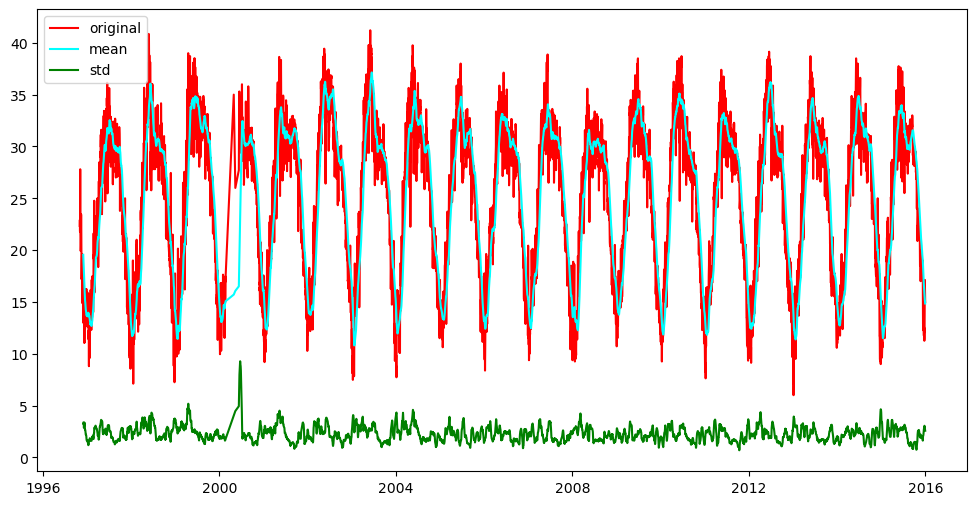

In [11]:
plt.figure(figsize=(12,6))
plt.plot(dfMaxTemp,color='red',label='original')
plt.plot(rollingMean,color='cyan',label='mean')
plt.plot(rollingStd,color='green',label='std')
plt.legend()
plt.show()

In [12]:
print("Results of Dickey Fuller test")
dftest=adfuller(dfMaxTemp['maximumTemp'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller test
Test Statistic                -6.825052e+00
p-value                        1.957514e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.823000e+03
Critical Value (1%)           -3.431309e+00
Critical Value (5%)           -2.861964e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [13]:
dfMaxTemp_log=np.log(dfMaxTemp)
print("Results of Dickey Fuller test")
dftest=adfuller(dfMaxTemp_log['maximumTemp'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller test
Test Statistic                -6.966539e+00
p-value                        8.885064e-10
#Lags Used                     3.500000e+01
Number of Observations Used    6.823000e+03
Critical Value (1%)           -3.431309e+00
Critical Value (5%)           -2.861964e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [14]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['maximumTemp'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    

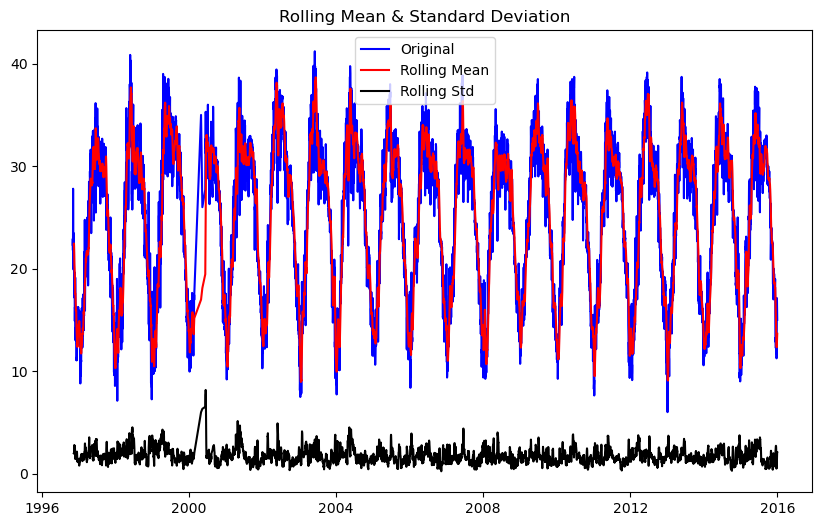

Results of Dickey Fuller Test:
Test Statistic                -6.825052e+00
p-value                        1.957514e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.823000e+03
Critical Value (1%)           -3.431309e+00
Critical Value (5%)           -2.861964e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [15]:
test_stationarity(dfMaxTemp)

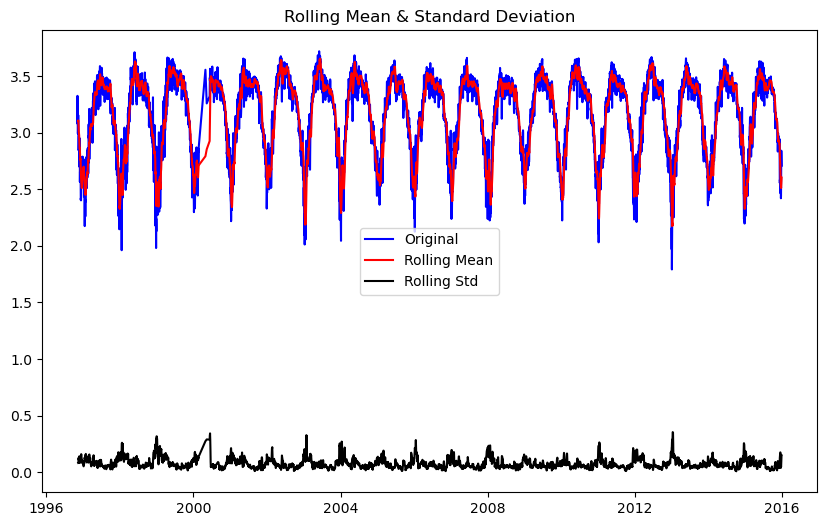

Results of Dickey Fuller Test:
Test Statistic                -6.966539e+00
p-value                        8.885064e-10
#Lags Used                     3.500000e+01
Number of Observations Used    6.823000e+03
Critical Value (1%)           -3.431309e+00
Critical Value (5%)           -2.861964e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [16]:
test_stationarity(dfMaxTemp_log)

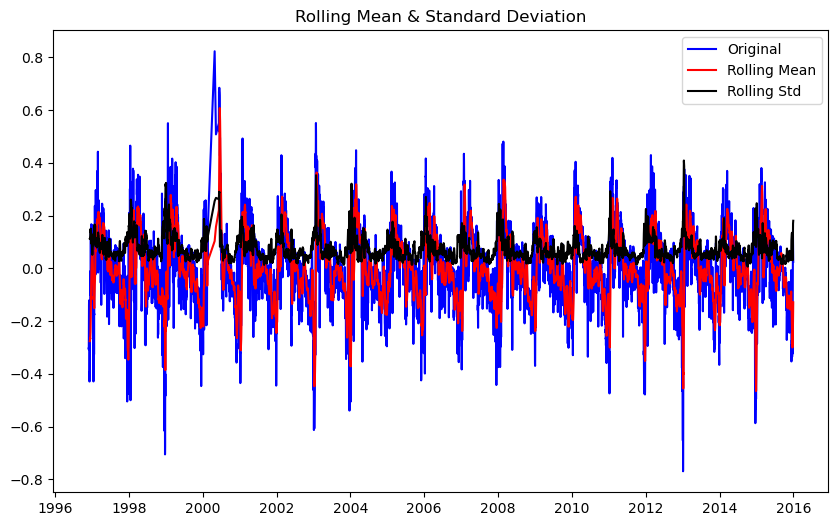

Results of Dickey Fuller Test:
Test Statistic                -8.004505e+00
p-value                        2.286808e-12
#Lags Used                     3.200000e+01
Number of Observations Used    6.797000e+03
Critical Value (1%)           -3.431312e+00
Critical Value (5%)           -2.861965e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [17]:
dfMaxTemp_log=np.log(dfMaxTemp)
dfMaxTemp_logRolling=dfMaxTemp_log.rolling(window=30).mean()
dfMaxTemp_logMinusRolling=dfMaxTemp_log-dfMaxTemp_logRolling
dfMaxTemp_logMinusRolling.dropna(inplace=True)
test_stationarity(dfMaxTemp_logMinusRolling)

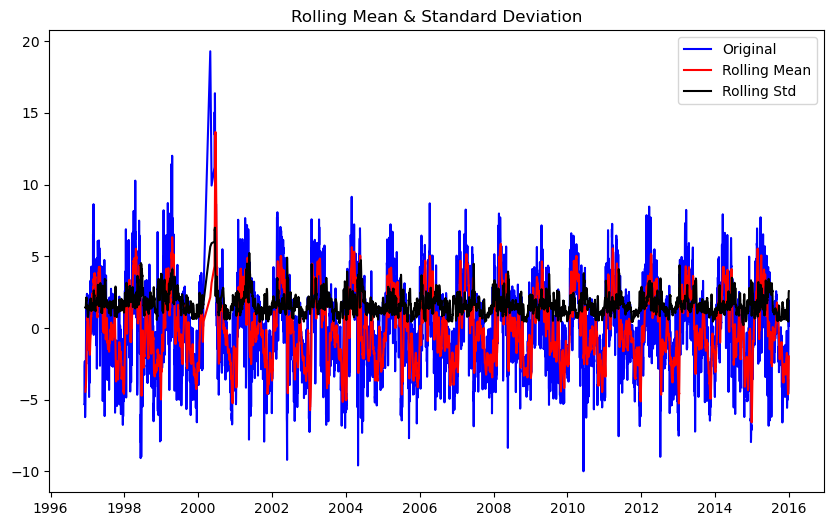

Results of Dickey Fuller Test:
Test Statistic                -7.648118e+00
p-value                        1.819569e-11
#Lags Used                     3.100000e+01
Number of Observations Used    6.798000e+03
Critical Value (1%)           -3.431312e+00
Critical Value (5%)           -2.861965e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [18]:
dfMaxTemp_minusRolling=dfMaxTemp-dfMaxTemp.rolling(window=30).mean()
dfMaxTemp_minusRolling.dropna(inplace=True)
test_stationarity(dfMaxTemp_minusRolling)

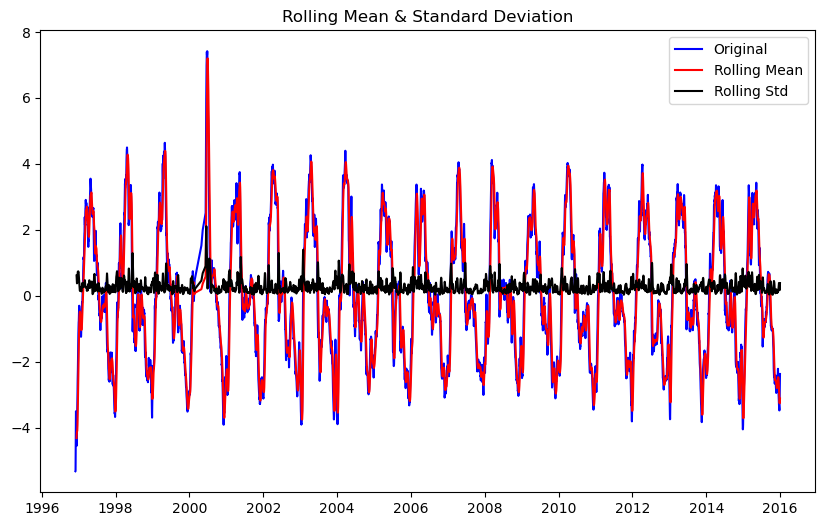

Results of Dickey Fuller Test:
Test Statistic                -7.573688e+00
p-value                        2.797780e-11
#Lags Used                     7.000000e+00
Number of Observations Used    6.822000e+03
Critical Value (1%)           -3.431309e+00
Critical Value (5%)           -2.861964e+00
Critical Value (10%)          -2.566996e+00
dtype: float64


In [19]:
dfExponentialDecayTransformation = dfMaxTemp_minusRolling.ewm(halflife=12, min_periods=0, adjust=True).mean()
dfExponentialDecayTransformation.dropna(inplace=True)
test_stationarity(dfExponentialDecayTransformation)

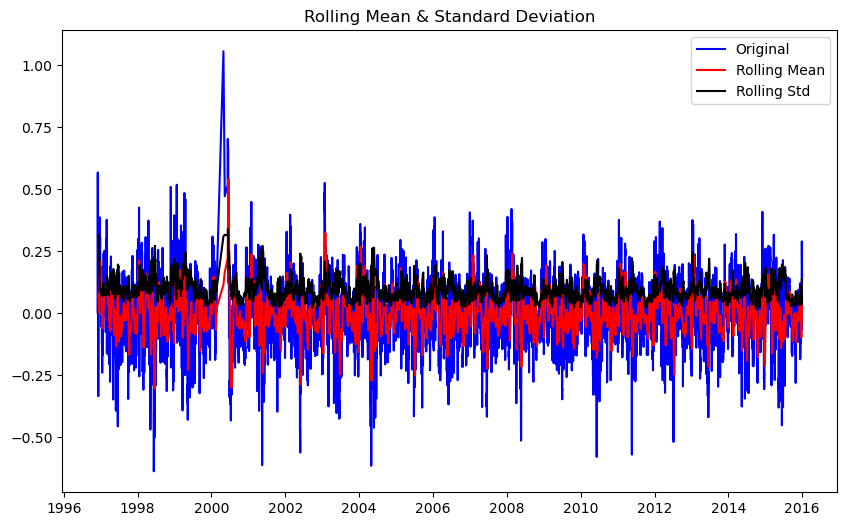

Results of Dickey Fuller Test:
Test Statistic                  -23.323551
p-value                           0.000000
#Lags Used                        5.000000
Number of Observations Used    6823.000000
Critical Value (1%)              -3.431309
Critical Value (5%)              -2.861964
Critical Value (10%)             -2.566996
dtype: float64


In [20]:
dfExponentialShifted = dfExponentialDecayTransformation - dfExponentialDecayTransformation.shift()
dfExponentialShifted.dropna(inplace=True)
dfExponentialDecayTransformation.drop(index=dfExponentialDecayTransformation.index[0],axis=0,inplace=True)
test_stationarity(dfExponentialShifted)

In [21]:
dfExponentialDecayTransformation

,maximumTemp
Date,
1996-12-01,-5.317496
1996-12-02,-4.757055
1996-12-03,-4.188926
1996-12-04,-3.782501
1996-12-05,-3.502054
...,...
2015-12-27,-3.226211
2015-12-28,-2.936026
2015-12-29,-2.700949


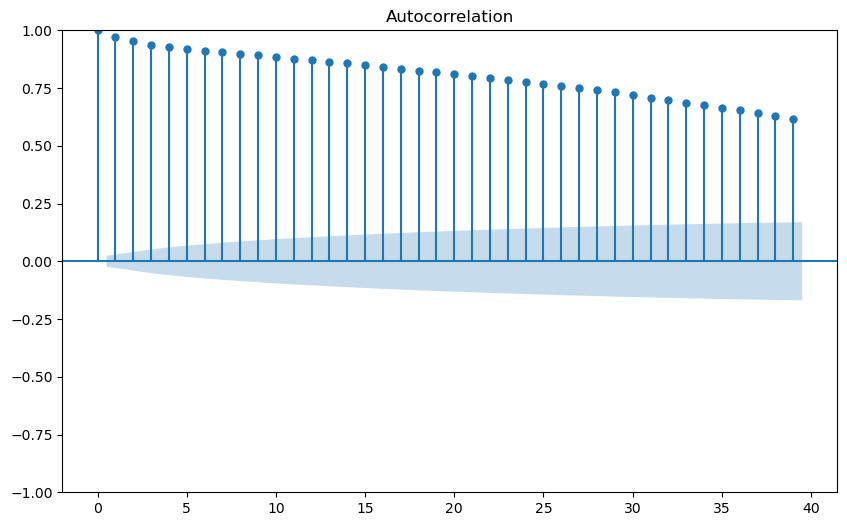

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dfMaxTemp_log)
plt.show()

In [23]:
dfExponentialShifted

,maximumTemp
Date,
1996-12-01,0.003378
1996-12-02,0.560441
1996-12-03,0.568129
1996-12-04,0.406425
1996-12-05,0.280448
...,...
2015-12-27,0.200158
2015-12-28,0.290184
2015-12-29,0.235077


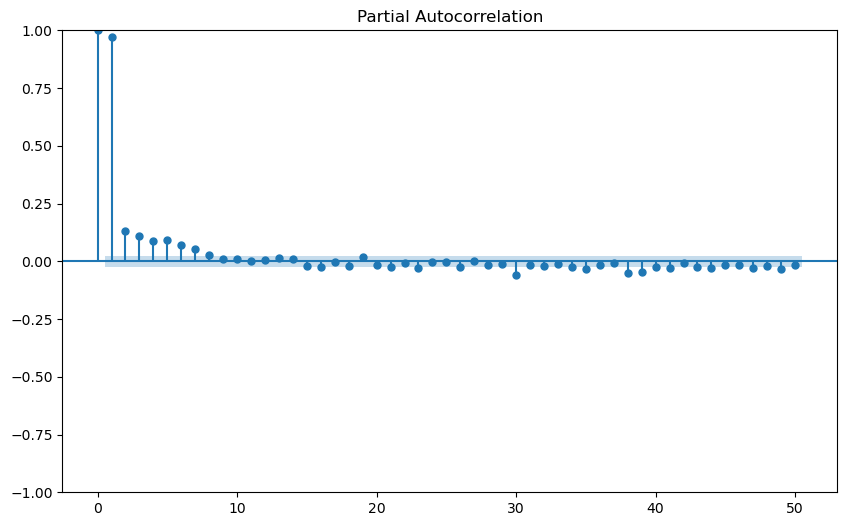

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfMaxTemp_log, lags=50)
plt.show()

In [68]:
import pandas as pd
import statsmodels.api as sm

# Split the data into training and test sets
train_data = dfExponentialDecayTransformation[:int(len(dfExponentialDecayTransformation) * 0.8)]
test_data = dfExponentialDecayTransformation[int(len(dfExponentialDecayTransformation) * 0.8):]

# Define the ARIMA model order using p, d, and q parameters
p = 2  # Number of autoregressive terms
d = 1  # Number of differencing terms (if applied)
q = 0  # Number of moving average terms

# Instantiate the ARIMA model
model = sm.tsa.ARIMA(train_data, order=(p, d, q))

# Fit the model to the training data
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions on the test data
predictions = results.forecast(steps=len(test_data))

# Evaluate the model's performance using metrics like MSE or RMSE
mse = ((predictions[5756] - test_data['maximumTemp']) ** 2).mean()
print('Mean Squared Error:', mse)


/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            maximumTemp   No. Observations:                 5756
Model:                 ARIMA(2, 1, 0)   Log Likelihood                5498.609
Date:                Wed, 15 Nov 2023   AIC                         -10991.217
Time:                        20:34:35   BIC                         -10971.244
Sample:                             0   HQIC                        -10984.267
                               - 5756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6986      0.010     71.065      0.000       0.679       0.718
ar.L2          0.0159      0.011      1.467      0.142      -0.005       0.037
sigma2         0.0087   9.05e-05     95.685      0.0

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [76]:
from statsmodels.tsa.arima.model import ARIMA
arimaModel = ARIMA(dfExponentialDecayTransformation['maximumTemp'], order=(2,1,0))
model=arimaModel.fit()
print(model.summary())
predictions=model.forecast(steps=len(testData))
print(predictions)
mse=((predictions[7196] - testData['maximumTemp'])**2).mean()
print("Mean Squared Error: ",mse)

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            maximumTemp   No. Observations:                 7196
Model:                 ARIMA(2, 1, 0)   Log Likelihood                6978.381
Date:                Wed, 15 Nov 2023   AIC                         -13950.762
Time:                        20:43:25   BIC                         -13930.118
Sample:                             0   HQIC                        -13943.658
                               - 7196                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6973      0.009     78.933      0.000       0.680       0.715
ar.L2          0.0140      0.010      1.447      0.148      -0.005       0.033
sigma2         0.0084   8.08e-05    104.170      0.0

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

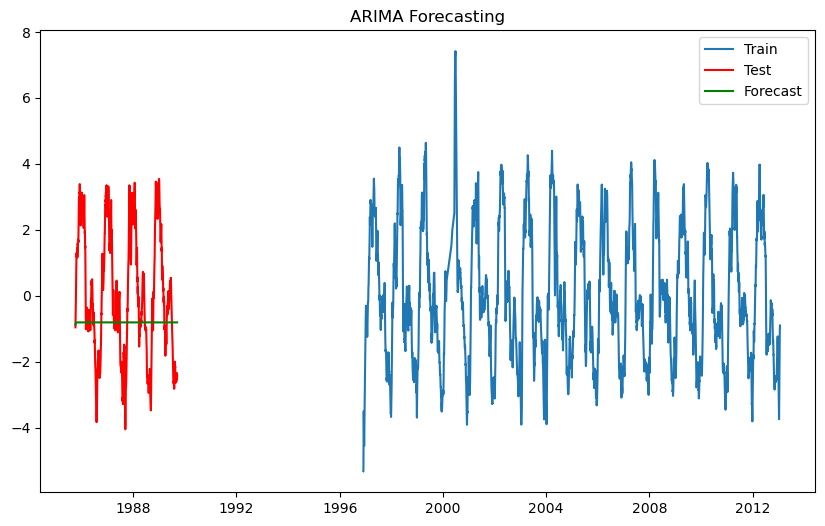

ValueError: Found input variables with inconsistent numbers of samples: [5756, 1440]

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Assuming 'transformed_series' is your stationary time series
# You can replace this with your actual transformed series data
# For example, if you have a DataFrame with a column 'Temperature', use: transformed_series = your_dataframe['Temperature']

# Generate a sample stationary time series for demonstration purposes
np.random.seed(42)
transformed_series = np.random.randn(100)

# Split the series into training and testing sets

train_size = int(len(dfExponentialDecayTransformation) * 0.8)
train, test = dfExponentialDecayTransformation[:train_size], dfExponentialDecayTransformation[train_size:]

# Build ARIMA model
order = (1, 1, 1)  # Adjust these values based on your analysis
model = ARIMA(train, order=order)
fit_model = model.fit()

# Forecast future values
forecast_steps = len(test)
forecast = fit_model.forecast(steps=forecast_steps)

# Plotting results
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + forecast_steps), test, label='Test', color='red')
plt.plot(range(train_size, train_size + forecast_steps), forecast, label='Forecast', color='green')
plt.legend()
plt.title('ARIMA Forecasting')
plt.show()

from sklearn.metrics import mean_squared_error

actual_values = train['maximumTemp']
forecasted_values = test['maximumTemp']

# Calculate Mean Squared Error
mse = mean_squared_error(actual_values, forecasted_values)

print(f'Mean Squared Error (MSE): {mse}')


/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting AR model


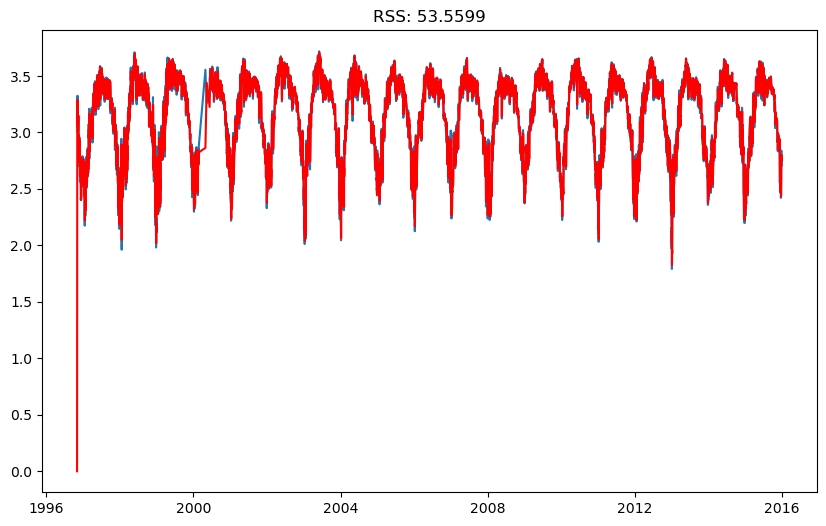

In [38]:
#AR Model
model = ARIMA(dfMaxTemp_log, order=(2,1,0))
results_AR = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting AR model')

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting MA model


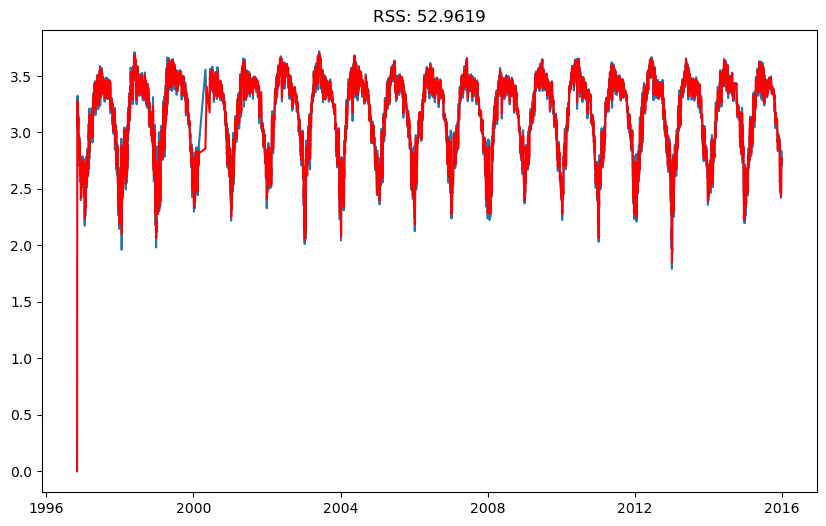

In [39]:
#MA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(dfMaxTemp_log, order=(0,1,2))
results_MA = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting MA model')

/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/monishramba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Plotting ARIMA model


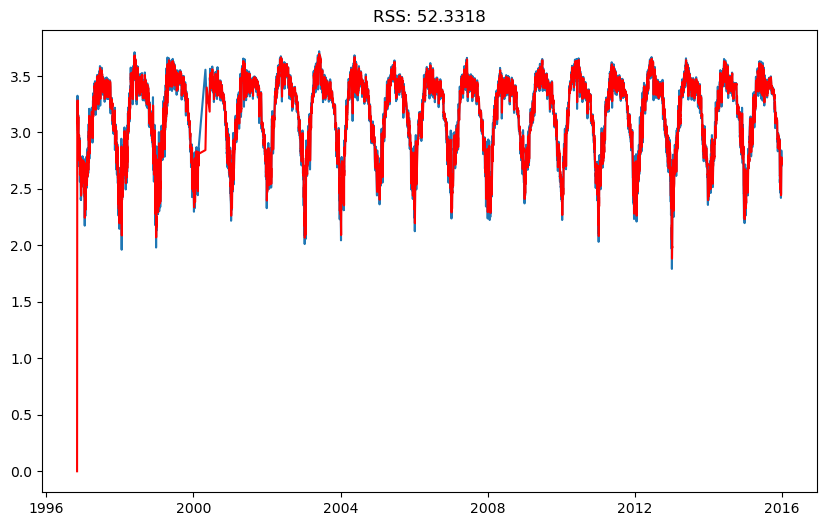

In [40]:
# AR+I+MA = ARIMA model
model = ARIMA(dfMaxTemp_log, order=(2,1,2))
results_ARIMA = model.fit()
plt.plot(dfMaxTemp_log)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - dfMaxTemp_log['maximumTemp'])**2))
print('Plotting ARIMA model')

In [41]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

Date
1996-11-01    0.000000
1996-11-02    3.106080
1996-11-03    3.127962
1996-11-04    3.086771
1996-11-05    3.120715
                ...   
2015-12-27    2.536223
2015-12-28    2.687422
2015-12-29    2.780460
2015-12-30    2.757384
2015-12-31    2.722218
Length: 6859, dtype: float64

In [44]:
predictions=np.exp(predictions_ARIMA_diff)
predictions.to_csv("Does this work ?.csv")
predictions

Date
1996-11-01     1.000000
1996-11-02    22.333333
1996-11-03    22.827410
1996-11-04    21.906237
1996-11-05    22.662585
                ...    
2015-12-27    12.631867
2015-12-28    14.693743
2015-12-29    16.126435
2015-12-30    15.758558
2015-12-31    15.214022
Length: 6859, dtype: float64

In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(dfMaxTemp, predictions)
print(mse)

2.931301218448113


In [119]:
dfExponentialDecayTransformation.to_csv("Exponential Dataset.csv")
predictions_ARIMA_diff.to_csv("Predicted Dataset.csv")

In [130]:
dfExponentialDecayTransformation.dropna(inplace=True)
reversingData=dfExponentialDecayTransformation**(1/12)
rollingMeanReverse=dfExponentialDecayTransformation.rolling(window=30).mean()
reversedData=reversingData+rollingMeanReverse
reversingData

/Users/monishramba/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,maximumTemp
Date,
1996-12-02,NaN
1996-12-03,NaN
1996-12-04,NaN
1996-12-05,NaN
1996-12-06,NaN
...,...
2016-12-27,NaN
2016-12-28,NaN
2016-12-29,NaN


-1.138652316800375